In [244]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals
import matplotlib.pyplot as plt
from time import time
import sys
from abel.direct import direct_transform
from abel.tools.analytical import GaussianAnalytical
from xbeamfit import fitting
from xbeamfit import distributions 
import json
import numpy as np
import scipy as sp
import pandas as pd
import sys
import xbeamfit as xb 
from scipy import interpolate
from numpy import trapz
import scipy.integrate as integrate
from scipy import special
from scipy.stats import norm

from scipy.stats import chi
from scipy.stats import chi2
from xsuite_functions import footprint as fp


In [251]:
# find r from an abel transform of a q-gauss

x = np.linspace(-10,10,20000)

q0=1.5
b0 =  1/(5-3*q0)
A0 = 1

qgauss = xb.distributions.qGauss(x,mu=0,q=q0,A=A0,b=b0)
qgauss = np.nan_to_num(qgauss, 0)


############ Inverse Abel transform 

r = np.linspace(0.00001,10.00001,10000)
abel_qgauss = direct_transform(qgauss[10000:], dr=np.diff(r)[0], direction="inverse", correction=True)

abel_qgauss_r = abel_qgauss*r



Falling back to a pure Python backend...


In [252]:
xq= abel_qgauss_r/np.sum(abel_qgauss_r)
xq = np.nan_to_num(xq)

r_hist = np.random.choice(a=r,p=xq,size=100000)
theta_hist  = np.random.uniform(0,2*np.pi,size=100000)


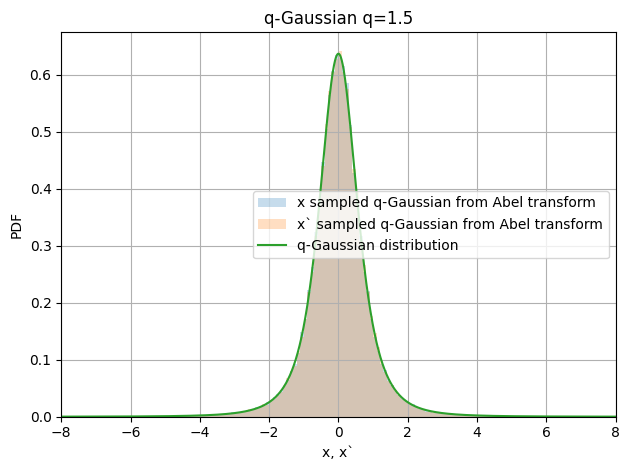

In [254]:
plt.hist(r_hist*np.cos(theta_hist), bins=400, range=[-20,20
                                                    ],density=True, alpha=0.25,  label='x sampled q-Gaussian from Abel transform');
plt.hist(r_hist*np.sin(theta_hist), bins=400, range=[-20,20],density=True, alpha=0.25, label='x` sampled q-Gaussian from Abel transform');
plt.xlim([-8,8],)
plt.plot(x,qgauss, label='q-Gaussian distribution')

plt.xlabel('x, x`')

plt.ylabel('PDF')
plt.title('q-Gaussian q=1.5')
plt.legend()
plt.grid()
plt.tight_layout()

plt.savefig('./presentation_plots/abel_compare_sampled_qgaussian_projection.png', dpi=400)


In [248]:
# find r from an abel transform of a q-gauss

x = np.linspace(-10,10,20000)

q0=1.5
b0 =  1/(5-3*q0)
A0 = 1

qgauss = xb.distributions.qGauss(x,mu=0,q=q0,A=A0,b=b0)
qgauss = np.nan_to_num(qgauss, 0)


############ Inverse Abel transform 

r = np.linspace(0.01,10.01,10000)
abel_qgauss = direct_transform(qgauss[10000:], dr=np.diff(r)[0], direction="inverse", correction=False)

abel_qgauss_r = abel_qgauss*r

xq= abel_qgauss_r/np.sum(abel_qgauss_r)
xq = np.nan_to_num(xq)

r_hist = np.random.choice(a=r,p=xq,size=100000)
theta_hist  = np.random.uniform(0,2*np.pi,size=100000)




Falling back to a pure Python backend...


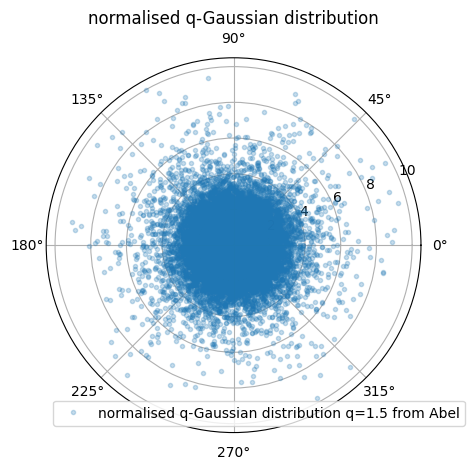

In [249]:
plt.figure()
plt.polar( theta_hist,r_hist, '.', alpha=0.25, label='normalised q-Gaussian distribution q=1.5 from Abel')

plt.savefig('presentation_plots/collimation_radial_1.png')
plt.title('normalised q-Gaussian distribution')
plt.legend()
plt.tight_layout()
plt.savefig('presentation_plots/collimation_radial_1.png', dpi=400)

In [229]:
collim_position = 3

r_collim = r_hist.copy()

for i in range(len(r_collim)):
    if r_collim[i] > collim_position:
        r_collim[i] = 0

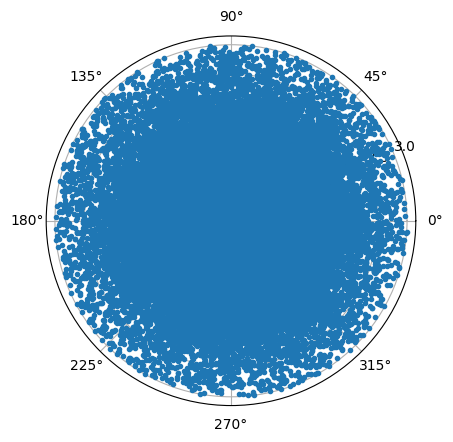

In [230]:
plt.polar(theta_hist, r_collim, '.')


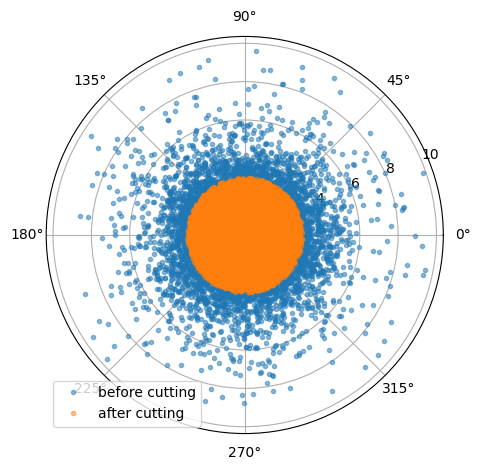

In [231]:
plt.polar(theta_hist, r_hist, '.', alpha=0.5,  label='before cutting')
plt.polar(theta_hist, r_collim, '.', alpha=0.5, label='after cutting')
plt.legend()
plt.tight_layout()
plt.savefig('presentation_plots/collimation_radial_2.png', dpi=400)


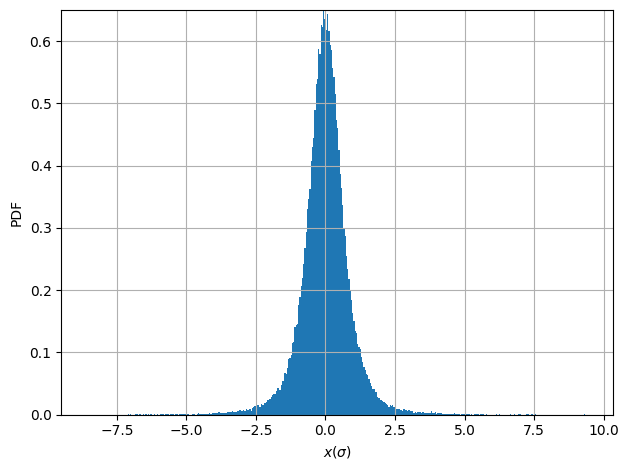

In [233]:
x_hist = np.cos(theta_hist)*r_hist
x_collim = np.cos(theta_hist)*r_collim 
plt.figure()
plt.hist(x_hist, bins=400, density=True);
plt.ylim([0,0.65])

plt.grid()
plt.xlabel('$x(\sigma)$')
plt.ylabel('PDF')
# renormalise this to have the same amount of values as before 
# is this the same as what you would expect? 
plt.tight_layout()
plt.savefig('presentation_plots/projection_x_qgauss.png', dpi=400)



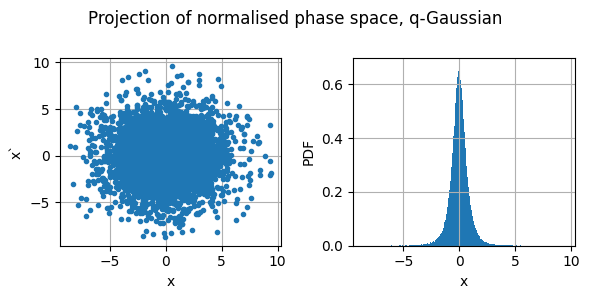

In [243]:
fig, axs = plt.subplots(1, 2, figsize=(6, 3), sharey=False)
axs[0].plot(r_hist*np.cos(theta_hist), r_hist*np.sin(theta_hist), '.')
axs[1].hist(x_hist, bins=400, density=True);
fig.suptitle('Projection of normalised phase space, q-Gaussian')
axs[0].grid()
axs[1].grid()
axs[0].set_xlabel('x')
axs[0].set_ylabel('x`')
axs[1].set_xlabel('x')
axs[1].set_ylim([0,0.7])
axs[1].set_ylabel('PDF')
plt.tight_layout()
fig.savefig('presentation_plots/projection_abel_qgaussian.png', dpi=400)





In [237]:
# now cut in jx and see what happens for a 1.6 sigma gaussian


########### Find the pdf in Jx 

pdf_jx_gauss = abel_qgauss_r/r*2*np.pi
jx = r**2/2



In [238]:
collim_position = 4.5

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx], idx


# find the index of Jx closest to
nearest, idx = find_nearest(jx, collim_position)

# make the array 0 after 4.5 sigma to simulate the cutting in Jx from the collimator 


pdf_r_cut = pdf_jx_cut*np.sqrt(2*jx)
r_new = np.sqrt(2*jx)
pdf_jx_cut = pdf_jx_gauss.copy()
pdf_jx_cut[idx:] = 0.0


# transform for the profile 
pdf_to_forward = pdf_r_cut/(2*np.pi*r)
abel_forward_gauss = direct_transform(pdf_to_forward, dr=np.diff(r)[0], direction="Forward", correction=True)

Falling back to a pure Python backend...


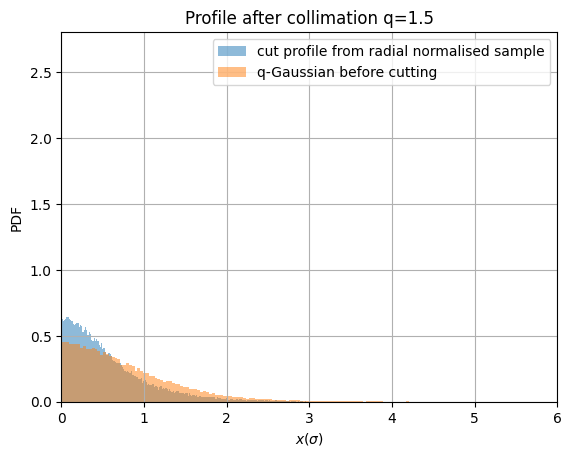

In [239]:
# you need to renormalise this


plt.hist(x_collim, bins=400,  density=True, label='cut profile from radial normalised sample', alpha=0.5);
#plt.plot(r, abel_forward_gauss, label='cut profile from $j_x$ pdf')
plt.hist(x_abel, bins=400, density=True, alpha=0.5, label='q-Gaussian before cutting')
plt.xlim([0,6])
plt.grid()
plt.legend()
#plt.ylim([0,1.5])
plt.xlabel('$x(\sigma)$')
plt.ylabel('PDF')
plt.title('Profile after collimation q=1.5')
plt.savefig('presentation_plots/cutting_compare_jx_sample_1.png')

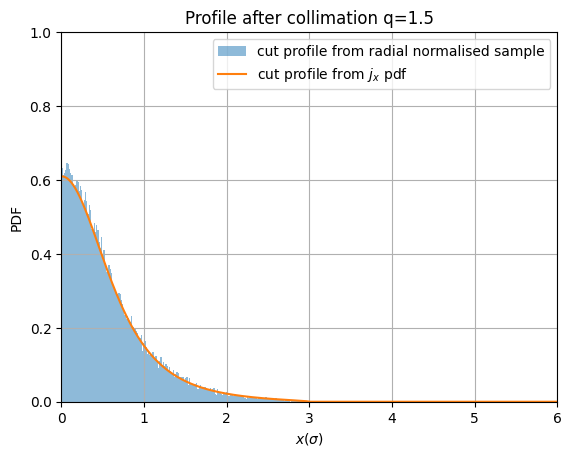

In [241]:
# you need to renormalise this


plt.hist(x_collim, bins=400, density=True, label='cut profile from radial normalised sample', alpha=0.5);
plt.plot(r, abel_forward_gauss, label='cut profile from $j_x$ pdf')
#plt.hist(x_abel, bins=400,  alpha=0.5, label='q-Gaussian before cutting')
plt.xlim([0,6])
plt.grid()
plt.legend()
plt.ylim([0,1])
plt.xlabel('$x(\sigma)$')
plt.ylabel('PDF')
plt.title('Profile after collimation q=1.5')
plt.savefig('presentation_plots/cutting_compare_jx_sample_2_1.png')

In [ ]:
# some normalisation factor due to the lost particles you have to apply


perc_g = 



print(perc_g)

collim_x = np.sqrt(2*collim_position)
# integrate underneath the normal distribution
normalised_original = sp.integrate.trapz(gauss[10000:], x=r, dx=np.diff(r)[0], axis=-1,)


# integrate under the abel_qgauss, find the ratio, add the % then should work ... to see the full distribution as you expect from before... 

normalised_refound = sp.integrate.trapz(abel_forward_gauss, x=r, dx=1, axis=-1)
print(normalised_original, normalised_refound)


n_o = normalised_original
n_r = normalised_refound

normalisation_factor = (1-perc_g/100)*(n_o/n_r)
print(normalisation_factor)